In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf,
    plot_raw_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/experiments/baseline/artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [3]:
cmap = 'viridis'

y_axis = {
    'auc':{
        'lim':[-0.18, 0.18],
        'lim_raw':[0.6,.95],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.25, 0.25],
        'lim_raw':[0,.75],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.10],
        'lim_raw':[0,0.15],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

train_years = {
    '2009_2010_2011_2012':'09-12',
}

#### ID Performance

In [4]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics)
print("ID Performance of Models Trained on 09-12")
display(df)

ID Performance of Models Trained on 09-12


Train Group                                        09-12
Task                   Metric                           
In-Hospital Mortality  AUROC         0.819 (0.79, 0.844)
                       AUPRC        0.096 (0.074, 0.123)
                       Calibration  0.005 (0.003, 0.008)
LOS > 7 Days           AUROC         0.753 (0.74, 0.765)
                       AUPRC         0.45 (0.424, 0.473)
                       Calibration  0.008 (0.003, 0.015)
Readmission in 30 Days AUROC        0.768 (0.748, 0.788)
                       AUPRC        0.258 (0.223, 0.299)
                       Calibration  0.007 (0.003, 0.011)
Admission to ICU       AUROC        0.841 (0.822, 0.857)
                       AUPRC        0.379 (0.333, 0.426)
                       Calibration   0.005 (0.002, 0.01)

#### Change in OOD performance relative to ID Performance 

    Change in OOD performance relative to ID performance of models trained on 09-12


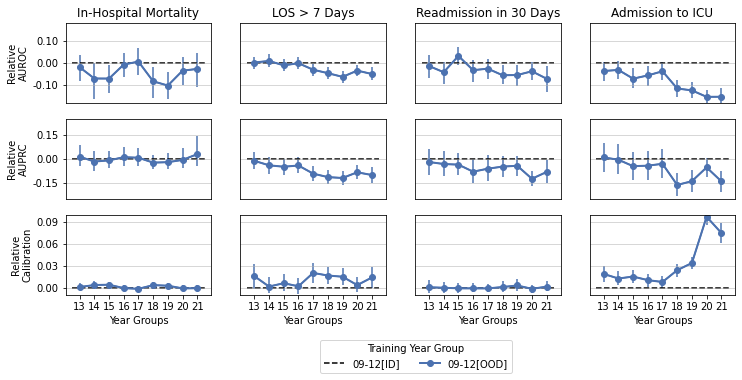

In [5]:
print("\
    Change in OOD performance relative to ID performance of models trained on 09-12\
")

plot_rel_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    y_axis,
    legend_bbox_to_anchor=(-0.5,-0.5),
    legend_ncols=2
)

#### Raw OOD Performance

    OOD performance of models trained on 09-12
    next to ID performance of 09-12 models and 
    ID performance of models trained on each year.


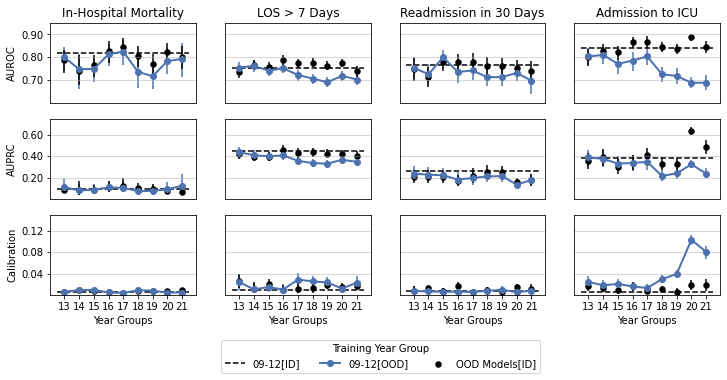

In [6]:
print("\
    OOD performance of models trained on 09-12\n\
    next to ID performance of 09-12 models and \n\
    ID performance of models trained on each year.\
")

plot_raw_ood_perf(
    artifacts_fpath,
    train_years,
    tasks,
    metrics,
    y_axis,
    legend_bbox_to_anchor=(-0.2,-0.5),
    legend_ncols=3
)